Simple quick update latest weather

In [49]:
# Tell matplotlib to plot in line
%matplotlib inline

# import pandas
import pandas

# seaborn magically adds a layer of goodness on top of Matplotlib
# mostly this is just changing matplotlib defaults, but it does also
# provide some higher level plotting methods.
import seaborn

# Tell seaborn to set things up
seaborn.set()

def smooth(data, thresh=None):
    
    means = data.mean()

    if thresh is None:
        sds = data.std()
    else:
        sds = thresh
    
    delta = data - data.shift()
    
    good = delta[abs(delta) < sds]

    #print(good.describe())
    
    return delta.where(good, 0.0)


In [50]:
infile = "../files/pijessie_weather.csv"

!scp 192.168.0.127:Adafruit_Python_BMP/weather.csv $infile

weather.csv                                   100% 3941KB   3.9MB/s   00:00    


In [51]:
""" assume it is csv and let pandas do magic

  index_col tells it to use the 'date' column in the data
  as the row index, plotting picks up on this and uses the
  date on the x-axis

  The *parse_dates* bit just tells it to try and figure out
  the date/time in the columne labeled 'date'.
"""
data = pandas.read_csv(infile, index_col='date', parse_dates=['date'])
#data = smooth(data)

# smooth the data to filter out bad temps and pressures
#data.altitude = (smooth(data.altitude, 5.0).cumsum() + data.altitude[0])
#data.temp = (smooth(data.temp, 5.0).cumsum() + data.temp[0])

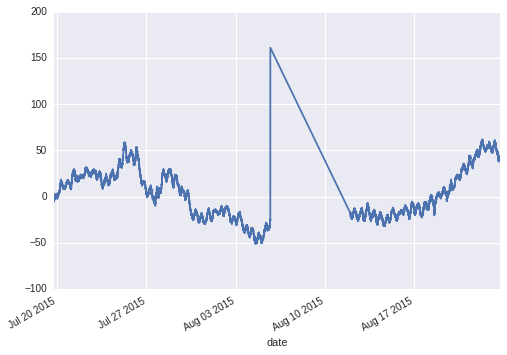

In [52]:
data.altitude.plot()

### Last 24 hours:

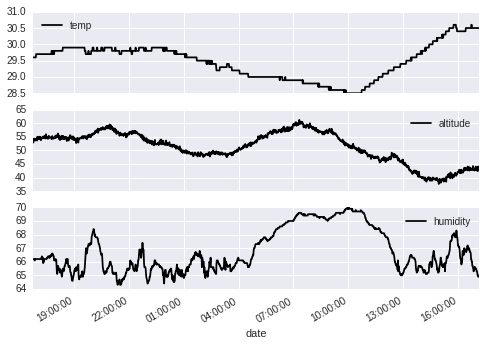

In [53]:
# reading is once a minute, so take last 24 * 60 readings
def plotem(data, n=-60):
    
    
    if n < 0:
        start = n
        end = len(data)
    else:
        start = 0
        end = n
        
    data[['temp', 'altitude', 'humidity']][n:].plot(subplots=True)
        
plotem(data, -24*60)

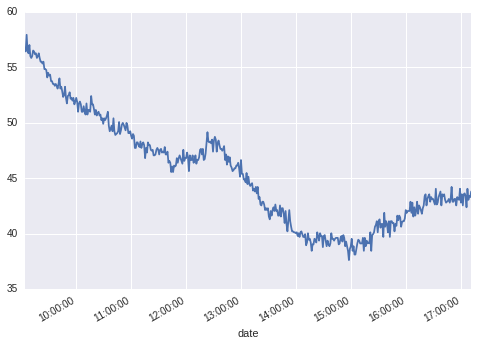

In [54]:
data.altitude[-8*60:].plot()

### Last week

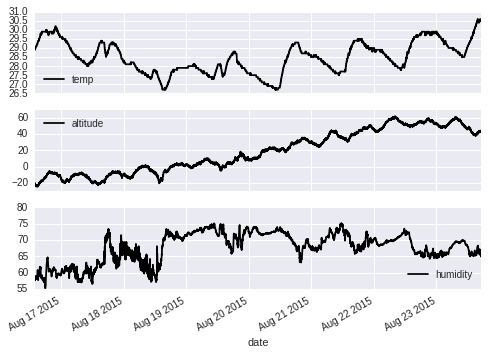

In [55]:
# reading is once a minute, so take last 7 * 24 * 60 readings
plotem(data, -7*24*60)

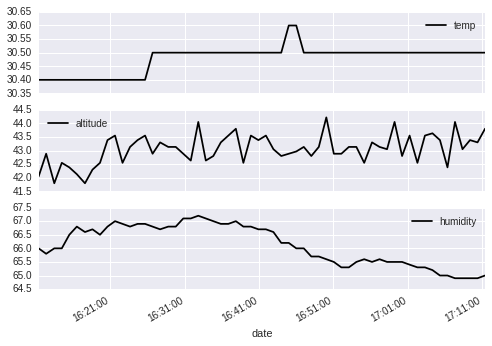

In [56]:
plotem(data)

## Look at all the data

In [57]:
data.describe()

,temp,pressure,altitude,sealevel_pressure,humidity,temp_dht
count,40611.000000,40611.000000,40611.000000,40611.000000,40609.000000,40609.000000
mean,28.617082,101293.341952,2.649373,101293.910418,68.316782,28.317732
std,1.138580,369.611433,26.442562,317.428166,5.049903,1.033547
min,26.300000,74637.000000,-51.241934,99411.000000,53.200001,26.000000
25%,27.800000,101054.000000,-19.130992,101055.000000,65.199997,27.500000
50%,28.600000,101307.000000,1.498691,101307.000000,69.000000,28.299999
75%,29.400000,101554.000000,22.503040,101555.000000,72.000000,29.100000
max,121.400000,117173.000000,161.089381,101941.000000,81.800003,30.700001


In [58]:
data.tail()

,temp,pressure,altitude,sealevel_pressure,humidity,temp_dht
date,,,,,,
2015-08-23 17:07:21.128620,30.5,100802,44.051475,100808,64.900002,30.200001
2015-08-23 17:08:21.770930,30.5,100806,43.048233,100809,64.900002,30.100000
2015-08-23 17:09:22.413400,30.5,100802,43.382636,100812,64.900002,30.100000
2015-08-23 17:10:23.055554,30.5,100808,43.299034,100802,64.900002,30.200001
2015-08-23 17:11:23.673878,30.5,100795,43.800656,100802,65.000000,30.100000


I currently have two temperature sensors:

* DHT22 sensor which gives temperature and humidity.
* BMP180 sensor which gives pressure and temperature.

The plot below shows the two temperature plots.

Both these sensors are currently in my study.  For temperature and humidity I would like to have some readings from outside.  If I can solder them to a phone jack then I can just run phone cable to where they need to be.

**Below** plots the current values from these sensors.  This is handy for calibration.

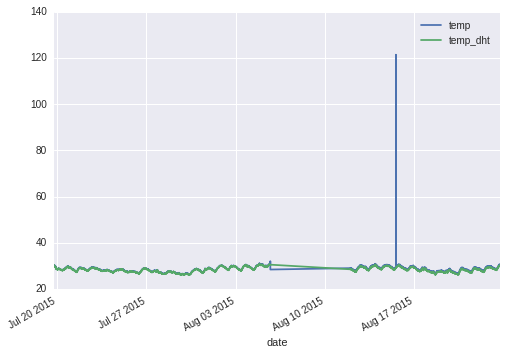

In [59]:
data[['temp', 'temp_dht']].plot()

## Dew Point

The warmer air is, the more moisture it can hold.  The *dew point* is
the temperature at which air would be totally saturated if it had as 
much moisture as it currently does. 

Given the temperature and humidity the *dew point* can be calculated, the actual formula is
pretty complex.

It is explained in more detail here: http://iridl.ldeo.columbia.edu/dochelp/QA/Basic/dewpoint.html

>If you are interested in a simpler calculation that gives an approximation of dew point temperature if you know >the observed temperature and relative humidity, the following formula was proposed in a 2005 article by Mark G. >Lawrence in the Bulletin of the American Meteorological Society:

$$Td = T - ((100 - RH)/5.)$$


In [60]:
data['dewpoint'] = data.temp - ((100. - data.humidity)/5.)

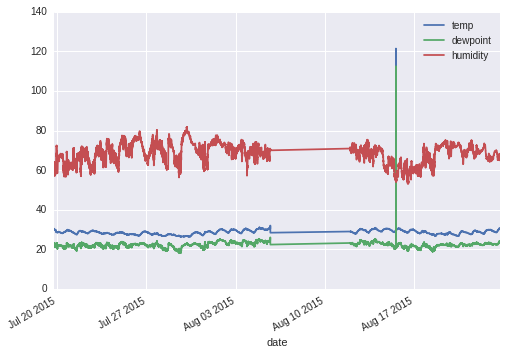

In [61]:
data[['temp', 'dewpoint', 'humidity']].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6e6ba6898>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7ff6e739b1d0>], dtype=object)

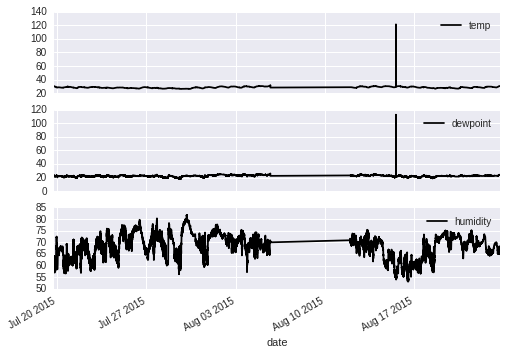

In [62]:
data[['temp', 'dewpoint', 'humidity']].plot(subplots=True)

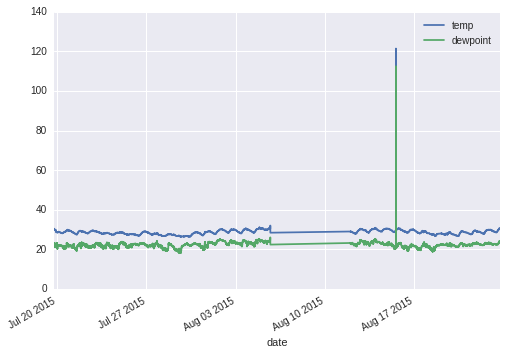

In [63]:
data[['temp', 'dewpoint']].plot()

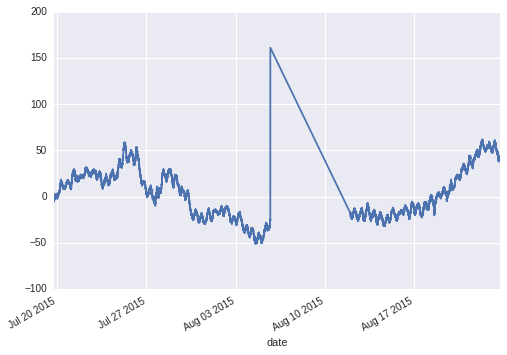

In [64]:
data.altitude.plot()